In [299]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import glob
from PIL import Image, ImageColor
import random
from sklearn.model_selection import train_test_split

In [28]:
data_path = "./data/rock_paper_scissors/*"
directories = glob.glob(data_path)
class_name = list(map(lambda x: x.split("/")[-1], directories))

['scissors', 'rock', 'paper']

In [42]:
name_jpg = dict()
for name in class_name:
    class_path = data_path.replace("*", name) + "/*"
    name_jpg.update({name : glob.glob(class_path)})

In [295]:
x_data = []
y_data = []
target_size = (28, 28)
for idx, name in enumerate(class_name):
    tmp = [np.array(Image.open(jpg).resize(target_size, Image.ANTIALIAS)) for jpg in name_jpg[name]]
    x_data.append(tmp)
    y_data.append([idx]*len(x_data[idx]))

In [297]:
x_data = np.array(x_data).reshape(-1, 28, 28, 3)
y_data = np.array(y_data).reshape(-1, 1)
print(y_data.shape)
print(x_data.shape)

(900, 1)
(900, 28, 28, 3)


In [298]:
np.random.seed(300)
np.random.shuffle(x_data)
np.random.seed(300)
np.random.shuffle(y_data)

In [312]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                  y_data, 
                                                  test_size = 0.1,
                                                 stratify = y_data)
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size = 0.1,
                                                 stratify = y_train)

In [333]:
print(f"훈련 데이터 독립변수 shape : {x_train.shape}")
print(f"검증 데이터 독립변수 shape : {x_val.shape}")
print("\n")
print(f"훈련 데이터 종속변수 shape : {y_train.shape}")
print(f"검증 데이터 종속변수 shape : {y_val.shape}")
print("\n")
print(f"훈련 데이터 종속변수 클래스 비율 : {np.unique(y_train, return_counts=True)}")
print(f"검증 데이터 종속변수 클래스 비율 : {np.unique(y_val, return_counts=True)}")


훈련 데이터 독립변수 shape : (729, 28, 28, 3)
검증 데이터 독립변수 shape : (81, 28, 28, 3)


훈련 데이터 종속변수 shape : (729, 1)
검증 데이터 종속변수 shape : (81, 1)


훈련 데이터 종속변수 클래스 비율 : (array([0, 1, 2]), array([243, 243, 243]))
검증 데이터 종속변수 클래스 비율 : (array([0, 1, 2]), array([27, 27, 27]))


In [334]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [335]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
23/23 [==============================] - 0s 3ms/step - loss: 13.6149 - accuracy: 0.3838
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9335
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9961
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 8.7641e-04 - accuracy: 1.0000
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 4.1975e-04 - accuracy: 1.0000
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 3.6586e-04 - accuracy: 1.0000
Epoch 9/10
23/23 [==============================] - 0s 3ms/step - loss: 2.6552e-04 - accuracy: 1.0000
Epoch 10/10
23/23 [==============================] - 0s 3ms/step - loss: 1.5649e-04 - accuracy: 1.000

In [362]:
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

3/3 [==============================] - 0s 3ms/step - loss: 2.5115e-04 - accuracy: 1.0000
test_loss: 0.00025115470634773374 
test_accuracy: 1.0


In [351]:
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test
score = 0
for i in range(len(y_true)):
    if y_pred[i] == y_true[i]:
        score += 1
score = (score / len(y_true)) * 100
print(f"테스트 데이터에서의 모델 정확성 : {score}%")

테스트 데이터에서의 모델 정확성 : 100.0%


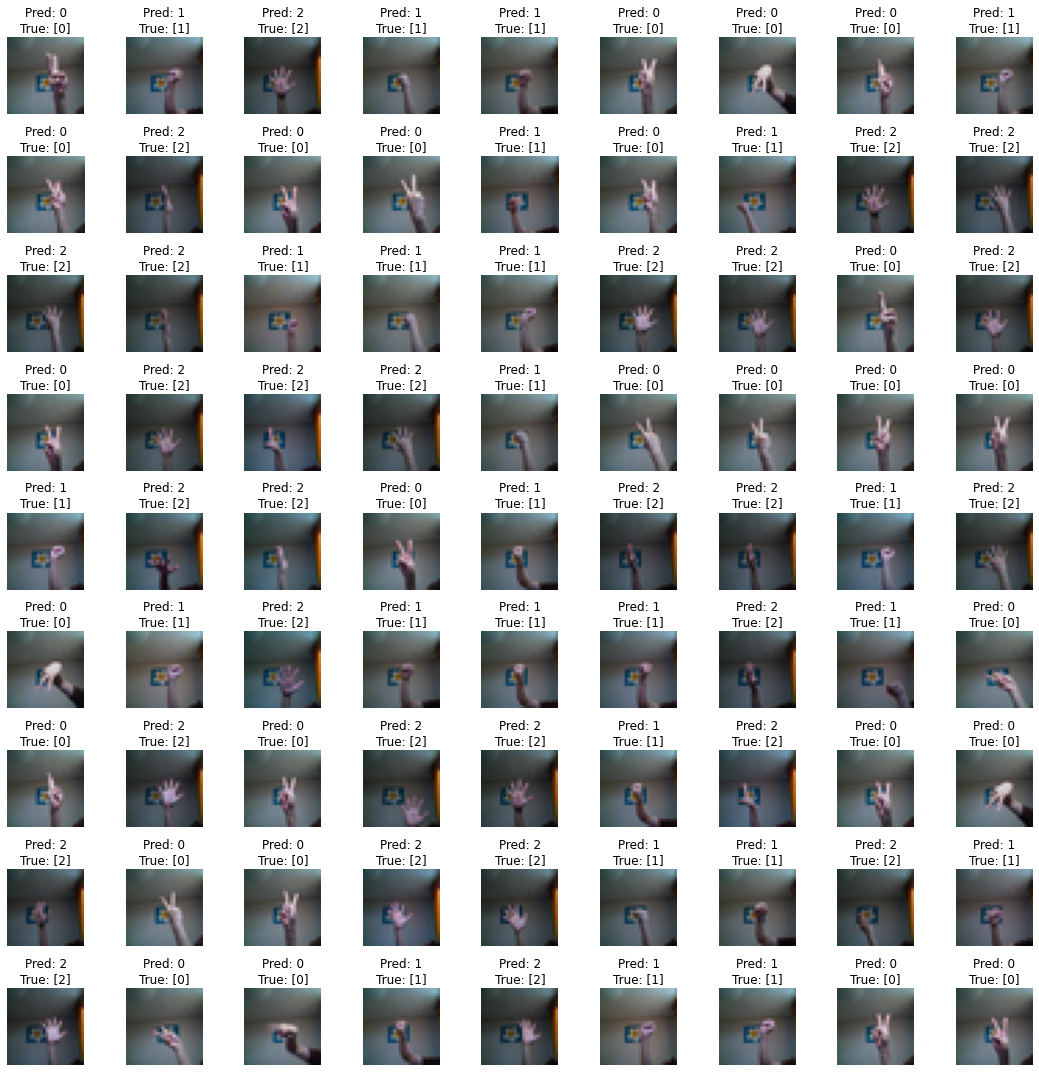

In [380]:
graph_n = round(np.sqrt(len(y_test)))
fig, axes = plt.subplots(graph_n, graph_n, figsize = (15, 15))
axes = axes.ravel()

for ind, axis in enumerate(axes):
    axis.imshow(x_test[ind])
    axis.set_title(f"Pred: {y_pred[ind]}\nTrue: {y_true[ind]}")
    axis.axis("off")
    
plt.tight_layout()
plt.show()